# NLP - Recurrent Neural Network

In this notebook, we will work on Toxic Comment dataset
---

We will cover the following techniques:

* Turn *raw text* into something neural networks can process. 
* How to **tokenize** text. 
* Use **Embedding layer**.
* Use **pre-trained word Embedding**.
* Use RNN : SimpleRNN, LSTM, Bidirectional LSTM..



# Download the data



* Files Description: 
    * train.csv - the training set, contains comments with their binary labels
    * test.csv - the test set, you must predict the toxicity probabilities for these comments. 
    * test_labels.csv - labels for the test data; value of -1 indicates it was not used for scoring; (Note: file added after competition close!)

* Data Description:
You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:

    * toxic
    * severe_toxic
    * obscene
    * threat
    * insult
    * identity_hate


* Objective : Create a model which predicts a probability of each type of toxicity for each comment.
-----

First, we create a list of texts and a list of labels from the data folder

In [1]:
# Import Modules
import pandas as pd
import os

In [2]:
data_dir = 'data'
train = pd.read_csv(os.path.join(data_dir, "train.csv"))
texts = train["comment_text"].fillna("DUMMY_VALUE").values
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
labels = train[possible_labels].values
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [3]:
print(texts)
print("\n Shape of texts : ", texts.shape)

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead o

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
labels.shape

(159571, 6)

# Parameters

In [6]:
max_length = 100
max_words = 20000
embedding_dim = 100

# Tokenize the data

In [7]:
import tensorflow

In [8]:
# Import Modules
#import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [9]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 210337 unique tokens.


In [10]:
# From texts to sequences of integers 
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen= max_length)
labels = np.asarray(labels)
# Shuffle Data
indices = np.arange(len(data))
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
print('Shape of data tensor:', data.shape)

Shape of data tensor: (159571, 100)


In [11]:
# Split 
split = int(.8 * len(texts))
train_data = data[:split]
train_labels = labels[:split]

test_data = data[split:]
test_labels = labels[split:]

# Using Embedding Layer

In [12]:
# We create a model with Embedding Layer
from tensorflow.keras import models, layers

In [13]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          2000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 60006     
Total params: 2,060,006
Trainable params: 2,060,006
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [15]:
history = model.fit(train_data, train_labels, epochs = 5, batch_size=128, validation_split=.2)

Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 20s 200us/sample - loss: 0.0870 - accuracy: 0.9726 - val_loss: 0.0726 - val_accuracy: 0.9767
Epoch 2/5
102124/102124 [==============================] - 19s 189us/sample - loss: 0.0661 - accuracy: 0.9784 - val_loss: 0.0693 - val_accuracy: 0.9780
Epoch 3/5
102124/102124 [==============================] - 19s 184us/sample - loss: 0.0612 - accuracy: 0.9798 - val_loss: 0.0693 - val_accuracy: 0.9781
Epoch 4/5
102124/102124 [==============================] - 19s 189us/sample - loss: 0.0562 - accuracy: 0.9812 - val_loss: 0.0712 - val_accuracy: 0.9776
Epoch 5/5
102124/102124 [==============================] - 19s 189us/sample - loss: 0.0507 - accuracy: 0.9829 - val_loss: 0.0733 - val_accuracy: 0.9768


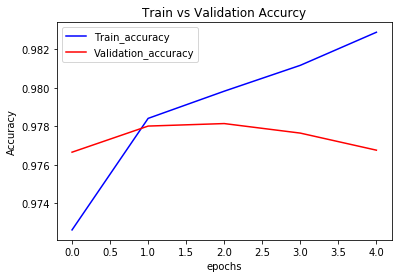

In [16]:
plt.plot(history.history["accuracy"], "b", label = "Train_accuracy")
plt.plot(history.history["val_accuracy"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

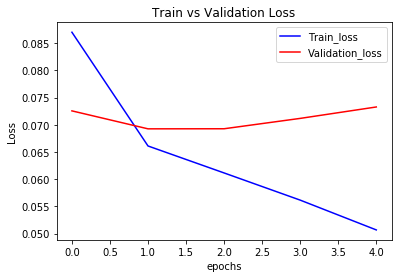

In [17]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

In [18]:
print("metrics names : ",model.metrics_names)

metrics names :  ['loss', 'accuracy']


In [21]:
#score = model.evaluate(test_data, test_labels)
score

[0.07539819467783011, 0.97660494]

# Using Pre-trained Word Embedding

### Embedding_index : dictionary { word : vector}

In [22]:
dir_glove = "glove.6B.100d.txt"

embedding_index = {}


f = open(dir_glove, encoding = "utf8")
for line in f:
    values = line.split()
    word = values[0]
    embedding_index[word] = np.asarray(values[1:], dtype = "float32")
f.close()

### Embedding_matrix of shape (max_words, embedding_dimension)

In [23]:
embedding_matrix = np.zeros((max_words,embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word) 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### load pre-trained word embeddings into an Embedding layer

In [24]:
num_words = min(max_words, len(word_index) + 1)

embedding_layer = layers.Embedding(
  num_words,
  embedding_dim,
  weights=[embedding_matrix],
  input_length=max_length,
  trainable=False
)

### Create a Model with a pre-trained Embedding layer

In [25]:
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.Flatten())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 60006     
Total params: 2,060,006
Trainable params: 60,006
Non-trainable params: 2,000,000
_________________________________________________________________


In [26]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [27]:
history = model.fit(train_data, train_labels, epochs = 5, batch_size=128, validation_split=.2)

Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 9s 85us/sample - loss: 0.1002 - accuracy: 0.9695 - val_loss: 0.0902 - val_accuracy: 0.9715
Epoch 2/5
102124/102124 [==============================] - 9s 85us/sample - loss: 0.0792 - accuracy: 0.9741 - val_loss: 0.0900 - val_accuracy: 0.9728
Epoch 3/5
102124/102124 [==============================] - 9s 84us/sample - loss: 0.0719 - accuracy: 0.9759 - val_loss: 0.0906 - val_accuracy: 0.9717
Epoch 4/5
102124/102124 [==============================] - 9s 86us/sample - loss: 0.0671 - accuracy: 0.9773 - val_loss: 0.0962 - val_accuracy: 0.9727
Epoch 5/5
102124/102124 [==============================] - 8s 79us/sample - loss: 0.0638 - accuracy: 0.9781 - val_loss: 0.0947 - val_accuracy: 0.9717


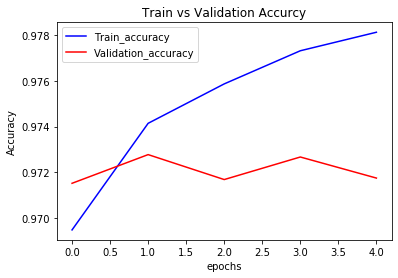

In [28]:
plt.plot(history.history["accuracy"], "b", label = "Train_accuracy")
plt.plot(history.history["val_accuracy"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

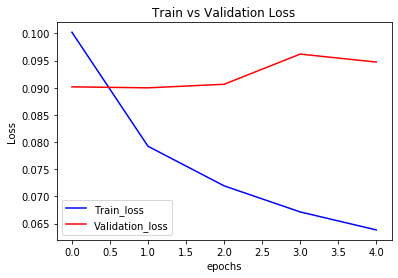

In [29]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

In [31]:
#score = model.evaluate(test_data, test_labels)
score

[0.094140003646324, 0.972448]

# Using Recurrent Neural Network 

### Simple RNN with numpy  

In [32]:
# Basic Recurrent Layer
T = 100
D = 10
V = 15



inputs = np.random.random((T,D))
W = np.random.random((V, D))
U = np.random.random((V, V))
b = np.random.random((V,))
    
s_t = np.zeros((V,))
outputs = []
for input in inputs:
    output = np.tanh(np.dot(W, input) + np.dot(U, s_t) + b) 
    outputs.append(output)
    s_t = output

outputs = np.asarray(outputs)

In [33]:
inputs.shape

(100, 10)

In [34]:
output.shape

(15,)

### SimpleRNN on dataset

In [35]:
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.SimpleRNN(embedding_dim))
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 2,020,706
Trainable params: 20,706
Non-trainable params: 2,000,000
_________________________________________________________________


In [36]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [37]:
history = model.fit(train_data, train_labels, epochs = 5, batch_size=128, validation_split=.2)

Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 55s 540us/sample - loss: 0.0969 - accuracy: 0.9686 - val_loss: 0.0752 - val_accuracy: 0.9741
Epoch 2/5
102124/102124 [==============================] - 64s 630us/sample - loss: 0.0805 - accuracy: 0.9723 - val_loss: 0.0714 - val_accuracy: 0.9754
Epoch 3/5
102124/102124 [==============================] - 55s 534us/sample - loss: 0.0759 - accuracy: 0.9736 - val_loss: 0.0725 - val_accuracy: 0.9754
Epoch 4/5
102124/102124 [==============================] - 59s 577us/sample - loss: 0.0743 - accuracy: 0.9739 - val_loss: 0.0761 - val_accuracy: 0.9757
Epoch 5/5
102124/102124 [==============================] - 54s 532us/sample - loss: 0.0725 - accuracy: 0.9746 - val_loss: 0.0704 - val_accuracy: 0.9760


In [39]:
# Evaluate the model 
#score = model.evaluate(test_data, test_labels)
score

[0.07140071686930965, 0.9765264]

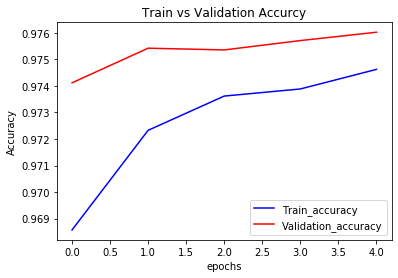

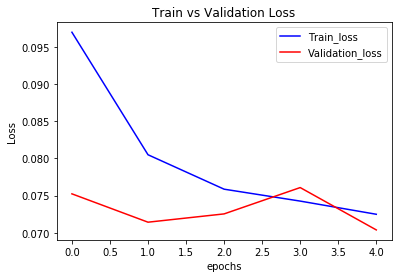

In [40]:
# Plots 
plt.plot(history.history["accuracy"], "b", label = "Train_accuracy")
plt.plot(history.history["val_accuracy"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

### LSTM with Global MaxPool 

In [41]:
# Create the Model
output_dim = 15
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.LSTM(output_dim, return_sequences = True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(train_data, train_labels, epochs = 5, batch_size=128, validation_split=.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100, 15)           6960      
_________________________________________________________________
global_max_pooling1d (Global (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 96        
Total params: 2,007,056
Trainable params: 7,056
Non-trainable params: 2,000,000
_________________________________________________________________
Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 68s 665us/sample - loss: 0.1235 - accuracy: 0.9676 - val_loss: 0.0760 - val_accuracy: 0.9736
Epoch 2/5
102124/102124 [==========

In [43]:
# Evaluate the model 
#score = model.evaluate(test_data, test_labels)
score

[0.05728228773426229, 0.980297]

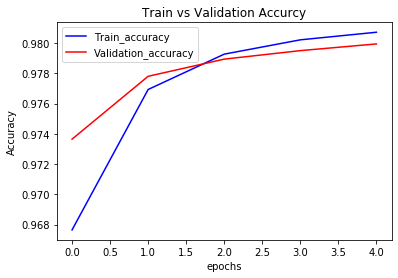

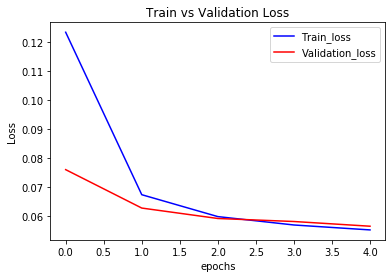

In [44]:
# Plots 
plt.plot(history.history["accuracy"], "b", label = "Train_accuracy")
plt.plot(history.history["val_accuracy"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

### Bidirectional LSTM with GlobalMaxPool

In [45]:
output_dim = 15
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.Bidirectional(layers.LSTM(output_dim, return_sequences = True)))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(train_data, train_labels, epochs = 5, batch_size=128, validation_split=.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 30)           13920     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 186       
Total params: 2,014,106
Trainable params: 14,106
Non-trainable params: 2,000,000
_________________________________________________________________
Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 101s 985us/sample - loss: 0.1073 - accuracy: 0.9696 - val_loss: 0.0646 - val_accuracy: 0.9775
Epoch 2/5
102124/102124 [========

In [47]:
# Evaluate the model 
#score = model.evaluate(test_data, test_labels)
score

[0.05235638290867805, 0.9812314]

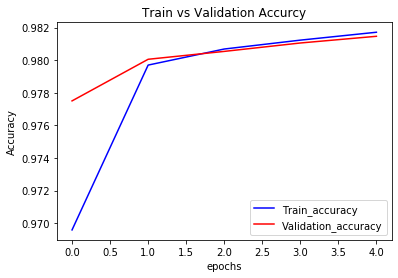

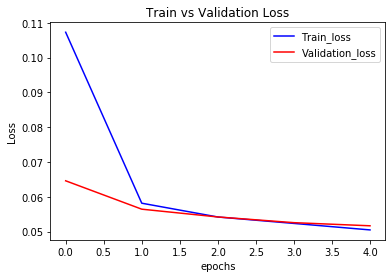

In [48]:
# Plots 
plt.plot(history.history["accuracy"], "b", label = "Train_accuracy")
plt.plot(history.history["val_accuracy"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()